<a href="https://colab.research.google.com/github/Sahilshajahan/spatial_data_analysis/blob/main/KDE%26Distance_based_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 find out whether it is clustered or dispersed or random using point pattern analysis 

In [24]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import geopandas as gpd
import numpy as np


In [26]:
points=gpd.read_file(r"/content/Assets.shp")

In [27]:
points

,Id,Assets,geometry
0,0,Villege Office,POINT (710908.055 959975.590)
1,0,Mosque,POINT (711300.898 959931.121)
2,0,Temple,POINT (711512.811 958614.311)
3,0,Anganvadi,POINT (711183.993 958430.866)
4,0,KSEB,POINT (710899.985 958515.707)
...,...,...,...
379,0,GOVT VHSS Pirappancode,POINT (710425.396 957583.765)
380,0,Transformer,POINT (711070.925 957781.873)
381,0,Church,POINT (711184.761 957092.065)
382,0,Temple,POINT (710940.690 956864.048)


In [28]:
points.coordinate=points['geometry']

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


In [29]:
points.coordinate

0      POINT (710908.055 959975.590)
1      POINT (711300.898 959931.121)
2      POINT (711512.811 958614.311)
3      POINT (711183.993 958430.866)
4      POINT (710899.985 958515.707)
                   ...              
379    POINT (710425.396 957583.765)
380    POINT (711070.925 957781.873)
381    POINT (711184.761 957092.065)
382    POINT (710940.690 956864.048)
383    POINT (715990.152 957420.225)
Name: geometry, Length: 384, dtype: geometry

In [30]:
listarray=[]     #converting to array
for i in points.coordinate:
    listarray.append([i.x,i.y])
nparray=np.array(listarray)

In [31]:
print(nparray)

[[710908.05482243 959975.58957921]
 [711300.89799933 959931.12061235]
 [711512.81069699 958614.31054974]
 [711183.99270677 958430.86565169]
 [710899.98459062 958515.707326  ]
 [711518.68298337 958874.57560959]
 [711924.9342281  959553.00145956]
 [712347.52311725 958937.42608369]
 [712795.5969848  959810.61439051]
 [713586.7779457  959916.25329233]
 [713589.86524952 959878.46012556]
 [713539.11073055 959805.49107041]
 [713652.63672584 959865.20875674]
 [713552.53445889 960010.11581506]
 [713740.3849201  959872.44397669]
 [713795.66942081 959624.74636635]
 [714384.77919501 959583.60111542]
 [714178.00737455 959916.50937474]
 [713795.58792663 960599.45393578]
 [713194.66974029 960906.53059089]
 [713589.37829371 961013.87466163]
 [713705.04147375 960937.08372779]
 [713159.65750981 961301.4027282 ]
 [713358.73416883 961350.19011054]
 [714208.01346856 961015.46974356]
 [713795.54746253 961446.0471184 ]
 [714055.54057028 961438.11828669]
 [714102.58510221 961422.33019786]
 [714722.38556918 96

In [32]:
pip install pointpats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from pointpats import PointPattern

In [34]:
pp=PointPattern(nparray)

/usr/local/lib/python3.8/dist-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [35]:
pp.points

,x,y
0,710908.054822,959975.589579
1,711300.897999,959931.120612
2,711512.810697,958614.310550
3,711183.992707,958430.865652
4,710899.984591,958515.707326
...,...,...
379,710425.396324,957583.765359
380,711070.925003,957781.873049
381,711184.760621,957092.065237
382,710940.689997,956864.048125


In [36]:
pp.summary()

Point Pattern
384 points
Bounding rectangle [(703713.0801655115,956864.0481250954), (718531.6563463791,969282.4268171953)]
Area of window: 184022690.69174576
Intensity estimate for window: 2.0866991921297027e-06
               x              y
0  710908.054822  959975.589579
1  711300.897999  959931.120612
2  711512.810697  958614.310550
3  711183.992707  958430.865652
4  710899.984591  958515.707326


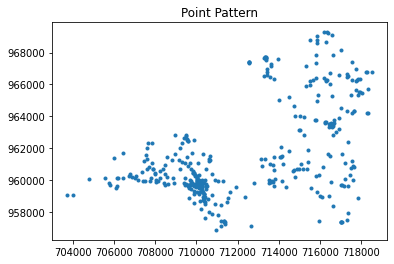

In [37]:
pp.plot()

In [38]:
import pointpats.centrography

In [39]:
import pointpats.quadrat_statistics as qs

In [40]:
qr = qs.QStatistic(pp,shape= "rectangle",nx = 3, ny = 3)

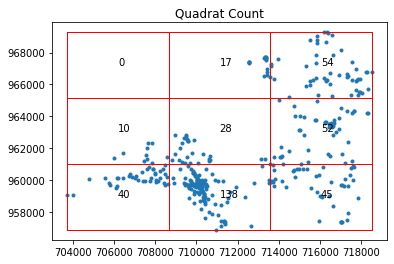

In [41]:
qr.plot()

In [42]:
qr.chi2   #chi square

306.51562500000006

In [43]:
qr.chi2_pvalue       #reject csr not random....less than<0.05.....clustered or disperesed

1.6889740001355146e-61

In [44]:
qr.df    #definition

8

DISTANCE BASED ANN,K,F,L,G



nearest neighbor

In [56]:
#SHOWS 1 THE NEAREST NEIGHBOUR
pp.knn()     #The first array is the ids of the most nearest neighbor
             # for each point, the second array is the distance between
             # each point and its most nearest neighbor.
    

(array([[ 46],
        [ 46],
        [  5],
        [  4],
        [  3],
        [  2],
        [ 45],
        [  6],
        [ 11],
        [ 10],
        [  9],
        [ 10],
        [ 47],
        [  9],
        [ 47],
        [ 14],
        [ 17],
        [350],
        [ 21],
        [ 22],
        [ 21],
        [ 20],
        [ 23],
        [ 22],
        [ 27],
        [ 26],
        [ 27],
        [ 26],
        [ 29],
        [ 28],
        [ 31],
        [ 30],
        [ 31],
        [ 31],
        [ 28],
        [ 36],
        [ 37],
        [ 38],
        [ 37],
        [ 48],
        [ 68],
        [ 68],
        [ 40],
        [ 44],
        [ 67],
        [  5],
        [  0],
        [ 12],
        [ 38],
        [ 41],
        [ 51],
        [ 50],
        [ 53],
        [ 54],
        [ 27],
        [ 65],
        [ 51],
        [ 59],
        [ 59],
        [ 58],
        [ 61],
        [ 59],
        [ 63],
        [ 62],
        [ 60],
        [ 33],
        [ 

In [52]:
#SHOWS THE 3 NEAREST NEIGHBOUR
pp.knn(3)  


(array([[ 46,   1, 230],
        [ 46,   0, 230],
        [  5,   3,   4],
        ...,
        [371, 373, 376],
        [381, 371, 376],
        [347, 346, 348]]),
 array([[ 147.85236313,  395.35205912,  408.58690057],
        [ 247.70682025,  395.35205912,  699.72832063],
        [ 260.33129879,  376.52795555,  620.70800895],
        ...,
        [ 227.76646954,  302.31417037,  305.43037823],
        [ 334.00939063,  560.48407928,  589.50776215],
        [1036.28394504, 1053.45391882, 1066.36466934]]))

In [53]:
# Maximum nearest neighbor distance
pp.max_nnd    

1266.9206461612587

In [54]:
# Minimum nearest neighbor distance
pp.min_nnd   

17.76568622893932

In [57]:
# Nearest neighbor distances
pp.nnd      


array([[ 147.85236313],
       [ 247.70682025],
       [ 260.33129879],
       [ 296.409716  ],
       [ 296.409716  ],
       [ 260.33129879],
       [ 447.76712181],
       [ 746.66887749],
       [ 743.53139714],
       [  37.9190572 ],
       [  37.9190572 ],
       [  88.88478051],
       [  53.27810983],
       [  99.91391076],
       [  71.70578214],
       [ 253.79220276],
       [ 391.89602557],
       [ 386.09352274],
       [ 349.56049059],
       [ 396.42131768],
       [ 138.83378096],
       [ 138.83378096],
       [ 204.967619  ],
       [ 204.967619  ],
       [ 420.29819141],
       [ 260.11397973],
       [  49.62309677],
       [  49.62309677],
       [  74.81813009],
       [  74.81813009],
       [  87.27106471],
       [  87.27106471],
       [ 173.58915877],
       [ 288.12221144],
       [ 409.91882001],
       [ 398.40738352],
       [ 299.77064134],
       [ 112.67414759],
       [ 112.67414759],
       [ 693.00820189],
       [ 135.44842607],
       [  47.189

In [68]:
from pointpats import G, F, K, L
#from pointpats import PointPattern, PoissonPointProcess, as_window, G, F, J, K, L

ImportError: ignored

In [61]:
#G FUNCTION - event-to-event

gplot = G(pp, intervals = 10)
gplot.plot()       #However, if the G function plot is above the expectation  this reflects clustering, while departures below expectation reflect dispersion.
                    #It is obvious that the above G increases very slowly at small distances and the line is below the expected value for a CSR process (green line).

NameError: ignored

In [ ]:
# F FUNCTION      When the number of events in a point pattern is small, Gfunction is rough (see the G
                  #function plot for the 12 size point pattern above). One way to get around this is to turn to F
                  #funtion where a given number of randomly distributed points are generated in the domain and the nearest event neighbor distance is calculated for each point. The cumulative distribution of all nearest event neighbor distances is called F function.

fplot = F(pp, intervals = 10)
fplot.plot()                        #F function is more smooth than G function.

Nearest neighbor distance functions consider only the nearest neighbor distances, "event-event", "point-event" or the combination. Thus, distances to higer order neighbors are ignored, which might reveal important information regarding the point process. Interevent distance functions, including K  and L functions, are proposed to consider distances between all pairs of event points. Similar to G , F and J functions, K and L functions are also cumulative distribution function.

In [ ]:
# K FUNCTION

kplot = K(pp, intervals = 10)
kplot.plot()

In [ ]:
# L FUNCTION       L function is a scaled version of K function

lplot = L(pp, intervals = 10)
lplot.plot()

# kernel based density

In [45]:
pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.1 MB/s eta 0:00:00


In [46]:
import pandas as pd
import contextily
import seaborn
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [47]:
db=pp.points    #data points

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


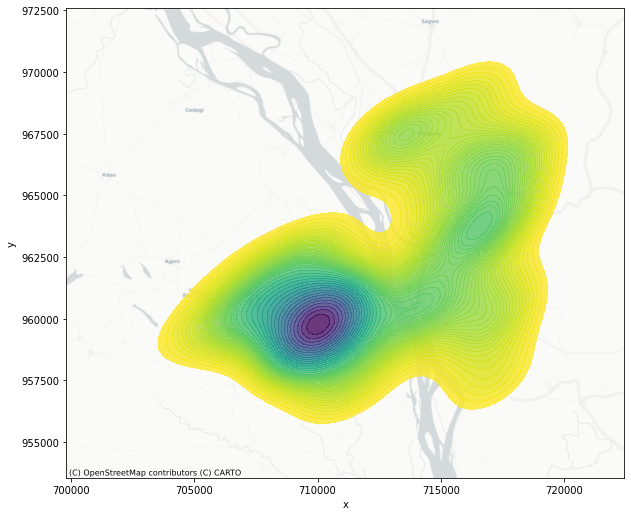

In [48]:
f,ax = plt.subplots(1, figsize=(10,10))   #setup figure
seaborn.kdeplot(
    db["x"],
    db["y"],
    n_levels=50,
    shade=True,
    alpha=0.8,
    cmap="viridis_r",       #color map
)
# Add basemap
contextily.add_basemap(
    ax,source=contextily.providers.CartoDB.Positron
)
# Remove axes
#ax.set_axis_off()

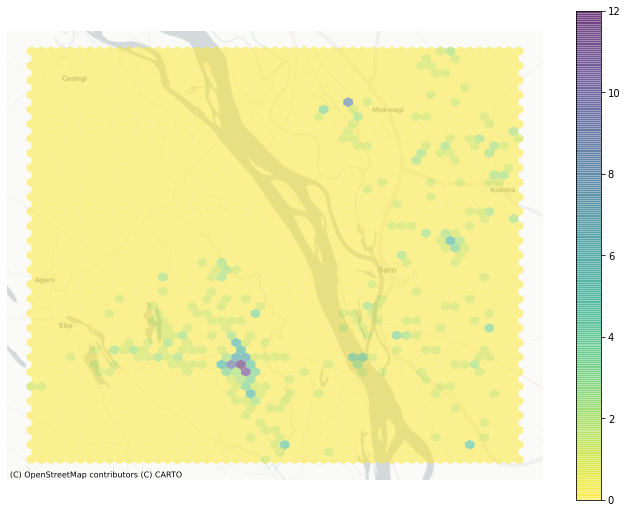

In [49]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    db["x"],
    db["y"],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

**DISTANCE** **BASED** - ANN, K , L, G 
